### PET ADOPTION Dataset

In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import math
import nltk as nlp
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns
!pip install -U textblob
from textblob import TextBlob

In [84]:
df_original = pd.read_csv('C:/Users/saksh/Desktop/train.csv')
df_original.head()

Type  Age  Gender  Color  Size  FurLength  Vaccinated  Dewormed  \
0     2    3       1      1     1          1           2         2   
1     2    1       1      1     2          2           3         3   
2     1    1       1      2     2          2           1         1   
3     1    4       2      1     2          1           1         1   
4     1    1       1      1     2          1           2         2   

   Sterilized  Health                                        Description  \
0           2       1  Nibble is a 3+ month old ball of cuteness. He ...   
1           3       1  I just found it alone yesterday near my apartm...   
2           2       1  Their pregnant mother was dumped by her irresp...   
3           2       1  Good guard dog, very alert, active, obedience ...   
4           2       1  This handsome yet cute boy is up for adoption....   

       PetID  AdoptionSpeed  
0  86e1089a3              2  
1  6296e909a              0  
2  3422e4906              3  
3  5842f1ff5              2  
4  850a43f90              2

### Data Preprocessing

In [111]:
df_original.shape

(14993, 13)

In [117]:
df1= df_original.drop_duplicates(subset = 'PetID', inplace = False)
df1.shape

(14993, 13)

In [118]:
df= df_original.drop_duplicates(subset = 'Description', inplace = False)
df.shape

(14002, 13)

In [ ]:
#Here, we can see that there are pets with different PetID but same Description. Hence, I removed those entries.

In [87]:
df.isna().sum() #no null values in the dataset except for the Description column

Type             0
Age              0
Gender           0
Color            0
Size             0
FurLength        0
Vaccinated       0
Dewormed         0
Sterilized       0
Health           0
Description      1
PetID            0
AdoptionSpeed    0
dtype: int64

In [8]:
#Now we convert the numerical data into text data so that we can create dummy variables

In [88]:
def my_func(row):
    if row['Type']==2:
        val = 'Cat'
    else:
        val = 'Dog'
    return val
df['Type'] = df.apply(my_func, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\1947388988.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Type'] = df.apply(my_func, axis=1)


In [89]:
def my_func2(row):
    if row['Gender']==2:
        val = 'Female'
    else:
        val = 'Male'
    return val
df['Gender'] = df.apply(my_func2, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\136547245.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Gender'] = df.apply(my_func2, axis=1)


In [90]:
def numtotext(row):
    if row.FurLength==1:
        val='Short'
    elif row.FurLength==2:
        val='Medium'
    elif row.FurLength==3:
        val='Long'
    else: val='Not Specified'
    return val
df['FurLength']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\2874342221.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FurLength']=df.apply(numtotext, axis=1)


In [91]:
def numtotext(df):
    if df.Vaccinated==1:
        val='Yes'
    elif df.Vaccinated==2:
        val='No'
    elif df.Vaccinated==3:
        val='Not Sure'
    else: val='Not Specified'
    return val
df['Vaccinated']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\207963058.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Vaccinated']=df.apply(numtotext, axis=1)


In [92]:
def numtotext(df):
    if df.Dewormed==1:
        val='Yes'
    elif df.Dewormed==2:
        val='No'
    elif df.Dewormed==3:
        val='Not Sure'
    else: val='Not Specified'
    return val
df['Dewormed']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\35500033.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Dewormed']=df.apply(numtotext, axis=1)


In [93]:
def numtotext(df):
    if df.Sterilized==1:
        val='Yes'
    elif df.Sterilized==2:
        val='No'
    elif df.Sterilized==3:
        val='Not Sure'
    else: val='Not Specified'
    return val
df['Sterilized']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\2206426617.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sterilized']=df.apply(numtotext, axis=1)


In [94]:
def numtotext(df):
    if df.Health==1:
        val='Healthy'
    elif df.Health==2:
        val='Minor Injury'
    elif df.Health==3:
        val='Serious Injury'
    else: val='Not Specified'
    return val
df['Health']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\3755023601.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Health']=df.apply(numtotext, axis=1)


In [95]:
def numtotext(df):
    if df.Color==1:
        val='Black'
    elif df.Color==2:
        val='Brown'
    elif df.Color==3:
        val='Golden'
    elif df.Color==4:
        val='Yellow'
    elif df.Color==5:
        val='Cream'
    elif df.Color==6:
        val='Gray'    
    else: val='White'
    return val
df['Color']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\1640194577.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Color']=df.apply(numtotext, axis=1)


In [96]:
def numtotext(df):
    if df.Size==1:
        val='Small'
    elif df.Size==2:
        val='Medium'
    elif df.Size==3:
        val='Large'
    else: val='Not Specified'
    return val
df['Size']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\3165463011.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size']=df.apply(numtotext, axis=1)


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14002 entries, 0 to 14992
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Type           14002 non-null  object
 1   Age            14002 non-null  int64 
 2   Gender         14002 non-null  object
 3   Color          14002 non-null  object
 4   Size           14002 non-null  object
 5   FurLength      14002 non-null  object
 6   Vaccinated     14002 non-null  object
 7   Dewormed       14002 non-null  object
 8   Sterilized     14002 non-null  object
 9   Health         14002 non-null  object
 10  Description    14001 non-null  object
 11  PetID          14002 non-null  object
 12  AdoptionSpeed  14002 non-null  int64 
dtypes: int64(2), object(11)
memory usage: 1.5+ MB


In [461]:
#Categorizing Adoption Speed into specific classes
#As per the existing dataset, following is the classification:

#Adoption Speed = 0, Adopted within a day
#Adoption Speed = 1, Adopted within a week
#Adoption Speed = 2, Adopted within a month
#Adoption Speed = 3, Adopted within 3 months
#Adoption Speed = 4, Not Adopted in 3 months

#For generating accurate predictions, we will categorize the Adoption Speed as follows:

#Adoption Speed = 0,1,2 -> Adoption Speed = Fast
#Adoption Speed = 3,4 -> Adoption Speed = Slow

In [98]:
#creating a column for categorizing Adoption Speed
df['AdoptionSpeed_categorical'] = df['AdoptionSpeed'] 

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\3188640627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AdoptionSpeed_categorical'] = df['AdoptionSpeed']


In [99]:
def numtotext(df):
    if df.AdoptionSpeed<=2:
        val='Fast'
    else:
        val='Slow'
    return val
df['AdoptionSpeed_categorical']=df.apply(numtotext, axis=1)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\962322626.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AdoptionSpeed_categorical']=df.apply(numtotext, axis=1)


### Text Analysis using TextBlob

In [119]:
text_list = df.Description.values.tolist()
print("length of text: ",len(text_list))

length of text:  14002


In [120]:
all_text = ''
for i in range(len(text_list)):
    all_text += str(text_list[i])

In [121]:
s1 = re.sub("[^a-zA-Z]"," ",all_text)
res = re.sub(' +', ' ', s1)
splitted_text = s1.split()
lemma = WordNetLemmatizer()
stp = stopwords.words('english')
splitted_text = [lemma.lemmatize(word) for word in splitted_text]
# Remove stopwords, stopwords are the words that has no special meaning such as I,You,Me,Was
splitted_text = [word for word in splitted_text if word not in stp]
# Join the elements of lists (["feel","good"] => "feel good")
splitted_text = " ".join(splitted_text)

In [123]:
def count_words(text):                  
    skips = [".", ", ", ":", ";", "'", '"'] 
    for ch in skips: 
        text = text.replace(ch, "") 
    word_counts = {} 
    for word in text.split(" "): 
        if word in word_counts: 
            word_counts[word]+= 1 
        else: 
            word_counts[word]= 1 
    return word_counts
count_words(splitted_text)

{'Nibble': 2,
 'month': 2937,
 'old': 2767,
 'ball': 111,
 'cuteness': 39,
 'He': 4373,
 'energetic': 181,
 'playful': 2438,
 'I': 9984,
 'rescued': 1757,
 'couple': 117,
 'cat': 5748,
 'ago': 605,
 'could': 663,
 'get': 1480,
 'neutered': 519,
 'time': 2045,
 'clinic': 204,
 'wa': 4858,
 'fully': 359,
 'scheduled': 14,
 'The': 1759,
 'result': 49,
 'little': 1565,
 'kitty': 614,
 'enough': 333,
 'space': 248,
 'fund': 25,
 'care': 2405,
 'household': 74,
 'Looking': 416,
 'responsible': 234,
 'people': 1197,
 'take': 2163,
 'found': 2333,
 'alone': 358,
 'yesterday': 83,
 'near': 613,
 'apartment': 418,
 'It': 695,
 'shaking': 9,
 'bring': 633,
 'home': 7654,
 'provide': 596,
 'temporary': 166,
 'Their': 146,
 'pregnant': 278,
 'mother': 1236,
 'dumped': 250,
 'irresponsible': 80,
 'owner': 2381,
 'roadside': 135,
 'shop': 256,
 'Subang': 150,
 'Jaya': 198,
 'Gave': 16,
 'birth': 643,
 'They': 1900,
 'healthy': 1898,
 'adorable': 1091,
 'puppy': 3582,
 'Already': 89,
 'dewormed': 698,

In [131]:
words_frequency = count_words(splitted_text)

In [132]:
word_df = pd.DataFrame.from_dict(words_frequency, orient = 'index')
word_df.reset_index(inplace = True)
word_df.columns = ['Word','Frequency Count']
word_df.sort_values(by=['Frequency Count'], ascending = False)

Word  Frequency Count
8                    I             9984
42                home             7654
72                 dog             5912
185                She             5759
11                 cat             5748
...                ...              ...
15279        FREEBlack                1
15280       overloaded                1
15282           Puddle                1
15285        tersangat                1
25953  lastoooooSerato                1

[25954 rows x 2 columns]

In [134]:
#creating an empty dataset 'subjectivity'
subjectivity = pd.DataFrame()
subjectivity['Index'] = []
subjectivity['Description'] = []
subjectivity['Subjectivity'] = []
print(subjectivity)

Empty DataFrame
Columns: [Index, Description, Subjectivity]
Index: []


In [135]:
for i in range(len(text_list)):
    all_text = str(text_list[i])
    testimonial = TextBlob(all_text)
    subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivity }, ignore_index = True)
C:\Users\saksh\AppData\Local\Temp\ipykernel_12588\890582595.py:4: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  subjectivity = subjectivity.append({'Index' : i, 'Description' : all_text, 'Subjectivity' : testimonial.subjectivit

In [136]:
subjectivity

Index                                        Description  \
0          0.0  Nibble is a 3+ month old ball of cuteness. He ...   
1          1.0  I just found it alone yesterday near my apartm...   
2          2.0  Their pregnant mother was dumped by her irresp...   
3          3.0  Good guard dog, very alert, active, obedience ...   
4          4.0  This handsome yet cute boy is up for adoption....   
...        ...                                                ...   
13997  13997.0                                              ooooo   
13998  13998.0  Serato(female cat- 3 color) is 4 years old and...   
13999  13999.0  Mix breed, good temperament kittens. Love huma...   
14000  14000.0  she is very shy..adventures and independent..s...   
14001  14001.0  Fili just loves laying around and also loves b...   

       Subjectivity  
0          0.407143  
1          0.400000  
2          0.542857  
3          0.437500  
4          0.743750  
...             ...  
13997      0.000000  
13998      0.287500  
13999      0.616667  
14000      0.650000  
14001      0.316667  

[14002 rows x 3 columns]

In [140]:
new_df = df.join(subjectivity, how = 'left', lsuffix = '_df', rsuffix = '_subjectivity')
subjectivity_df = new_df[['Description_df','AdoptionSpeed','Subjectivity']]
subjectivity_df.rename(columns = {'Description_df' : 'Description'})

Description  AdoptionSpeed  \
0      Nibble is a 3+ month old ball of cuteness. He ...              2   
1      I just found it alone yesterday near my apartm...              0   
2      Their pregnant mother was dumped by her irresp...              3   
3      Good guard dog, very alert, active, obedience ...              2   
4      This handsome yet cute boy is up for adoption....              2   
...                                                  ...            ...   
14987                                              ooooo              0   
14989  Serato(female cat- 3 color) is 4 years old and...              4   
14990  Mix breed, good temperament kittens. Love huma...              3   
14991  she is very shy..adventures and independent..s...              4   
14992  Fili just loves laying around and also loves b...              3   

       Subjectivity  
0          0.407143  
1          0.400000  
2          0.542857  
3          0.437500  
4          0.743750  
...             ...  
14987           NaN  
14989           NaN  
14990           NaN  
14991           NaN  
14992           NaN  

[14002 rows x 3 columns]

In [141]:
mean_subjectivity = subjectivity_df.groupby('AdoptionSpeed')['Subjectivity'].aggregate('mean')
mean_df = pd.DataFrame(mean_subjectivity)
mean_df.reset_index(inplace = True)
mean_df

AdoptionSpeed  Subjectivity
0              0      0.514916
1              1      0.510107
2              2      0.506131
3              3      0.513639
4              4      0.510205

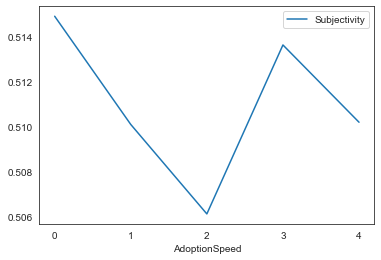

In [142]:
mean_df.plot.line('AdoptionSpeed','Subjectivity')
plt.xticks([0,1,2,3,4])
plt.show()

In [143]:
#Thus, we can observe here that there is no impact of the Subjectivity of the description on the Adoption Speed.